In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.cm as cm

In [2]:
# Load dataset
train_x1, train_x2, train_y = np.loadtxt("train.txt", delimiter='	', unpack=True)
test_x1, test_x2, test_y = np.loadtxt("test.txt", delimiter='	', unpack=True)

In [3]:
# Standardized data set
train_x1_st = np.divide(train_x1 - np.mean(train_x1), np.std(train_x1))
train_x2_st = np.divide(train_x2 - np.mean(train_x2), np.std(train_x2))
test_x1_st = np.divide(test_x1 - np.mean(test_x1), np.std(test_x1))
test_x2_st = np.divide(test_x2 - np.mean(test_x2), np.std(test_x2))

## 2a.) K = 1

In [4]:
test_pred = np.empty_like(test_y)
for i in range(len(test_y)):
    D = np.sqrt(np.power(test_x1_st[i] - train_x1_st, 2) + np.power(test_x2_st[i] - train_x2_st, 2))
    loc = np.where(D==np.min(D))
    test_pred[i] = train_y[loc]
print(test_pred)

[ 55.461515     0.          11.475198    17.38906      0.
  53.07535    146.18406     14.181068   153.40393      0.
 128.77913    114.65054     58.64206      0.          51.508358
  78.533193     0.          12.648002     0.         113.25884
  75.83036     90.581827    77.871924   -14.599333    61.229556
  90.226194     0.           0.          17.241655     0.
 122.71487     41.615319    57.901583    59.511669    35.542706
   0.           0.           0.           1.9007737   75.276499
 -14.578794    36.803512     0.          22.536151     5.3627958
  57.901583   139.04276    -13.846315   114.54738     26.40769
 106.95103      0.           0.          42.484169     0.
 -15.251612    43.620068   135.33714     62.664608   -23.569753
  56.579635    87.554611     0.         -26.804601   -29.749815
 -43.563548     0.          22.679611     0.63559485  27.267181
  27.267181   -18.432714   126.63901      0.         115.435
   0.          50.459331   106.20804     86.672665     0.
   0.     

## 2b.) K = 1 with meshgrid

C:\Users\ivanw\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


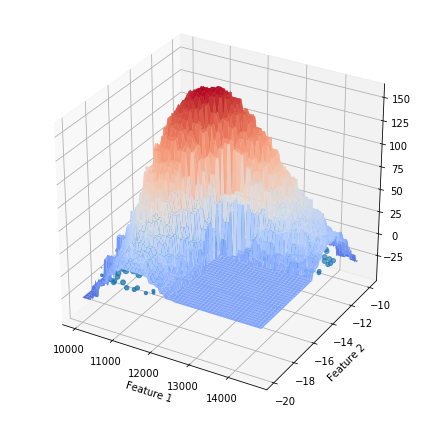

In [5]:
xx, yy = np.meshgrid(np.linspace(test_x1.min(), test_x1.max(), 100), np.linspace(test_x2.min(), test_x2.max(), 100))
xx_st = np.divide(xx - np.mean(xx), np.std(xx))
yy_st = np.divide(yy - np.mean(yy), np.std(yy))
test_array = np.c_[xx_st.ravel(), yy_st.ravel()]
test_pred = np.empty((len(test_array), 1))
for i in range(len(test_array)):
    D = np.sqrt(np.power(test_array[i, 0] - train_x1_st, 2) + np.power(test_array[i, 1] - train_x2_st, 2))
    loc = np.where(D==np.min(D))
    test_pred[i] = train_y[loc]
test_pred = test_pred.reshape(xx.shape)
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, test_pred, cmap=cm.coolwarm)
plt.scatter(test_x1, test_x2, test_y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
ax.set_zlim(np.array([test_pred.min(), test_y.min()]).min(), np.array([test_pred.max(), test_y.max()]).max())
plt.show()

## 2c.) K = 4

In [6]:
test_pred = np.empty_like(test_y)
for i in range(len(test_y)):
    D = np.sqrt(np.power(test_x1_st[i] - train_x1_st, 2) + np.power(test_x2_st[i] - train_x2_st, 2))
    # Sort by minimum value first
    id = np.argsort(D)[0:4]
    test_pred[i] = np.dot(np.array([0.25, 0.25, 0.25, 0.25]), np.array([train_y[id[0]], train_y[id[1]], train_y[id[2]], train_y[id[3]]]))
print(test_pred)

[ 60.522152     1.94127595  11.136918    17.470751     0.
  41.40336675 146.77692     14.51569213 155.13313      0.
 129.97032    110.880285    54.05887675   0.          31.5202205
  80.361862     0.          23.6494515    0.         115.4066425
  81.78022775  85.53800575  70.73461    -22.10840325  56.85368725
  89.71383975   0.           0.          19.04066625   0.
 123.7773875   39.7094055   57.40083775  62.32742     42.80022725
   0.           0.           0.           3.58384645  76.5797185
  13.29908775  37.80963075   0.          24.0293205   17.3209767
  55.5978445  138.1410775  -12.82536505 115.2187225   32.44839175
 113.854985     0.           0.          40.0382565    0.
 -13.87662607  43.19043425 127.2691475   72.65710625 -16.71533475
  61.13782525  92.88570825   0.         -18.591053   -29.36959625
 -42.06734825   0.          25.4658125    2.73056217  26.565107
  26.8740765  -13.87662608 124.77727      0.         112.63333
   0.          55.32488    105.96696775  76.0657905

## 2d.) K = 4 with meshgrid

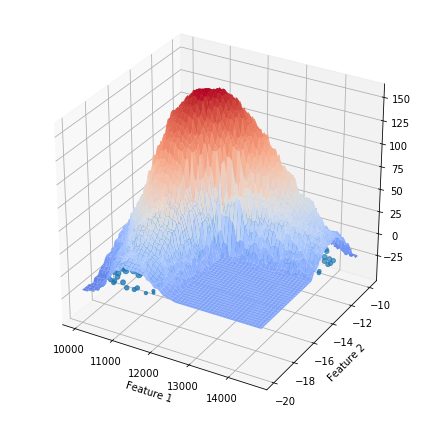

In [7]:
xx, yy = np.meshgrid(np.linspace(test_x1.min(), test_x1.max(), 100), np.linspace(test_x2.min(), test_x2.max(), 100))
xx_st = np.divide(xx - np.mean(xx), np.std(xx))
yy_st = np.divide(yy - np.mean(yy), np.std(yy))
test_array = np.c_[xx_st.ravel(), yy_st.ravel()]
test_pred = np.empty((len(test_array), 1))
for i in range(len(test_array)):
    D = np.sqrt(np.power(test_array[i, 0] - train_x1_st, 2) + np.power(test_array[i, 1] - train_x2_st, 2))
    id = np.argsort(D)[0:4]
    test_pred[i] = np.dot(np.array([0.25, 0.25, 0.25, 0.25]), np.array([train_y[id[0]], train_y[id[1]], train_y[id[2]], train_y[id[3]]]))
test_pred = test_pred.reshape(xx.shape)
fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, test_pred, cmap=cm.coolwarm)
plt.scatter(test_x1, test_x2, test_y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
ax.set_zlim(np.array([test_pred.min(), test_y.min()]).min(), np.array([test_pred.max(), test_y.max()]).max())
plt.show()